In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

# 영화평 데이터를 활용하여 워드 클라우드 생성
    - pres : 긍정평, 부정평순을 모두 크롤링

In [4]:
pres = ['https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=183854&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=highest&page=',
        'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=183854&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=lowest&page=']

review = []
rate = []
target = []

for pre in pres:
    for i in range(1, 250):
        url = pre + str(i)
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'html.parser')
        
    
        id_list = []
        id_pre = '_filtered_ment_'
    
        for i in range(10):
            id_list.append(id_pre+str(i))
        
        
        for id in id_list:
            review.append(soup.find('span',{'id':id}).get_text().strip())
    
        rate_list = []
        rate_list = (soup.select('div.star_score > em'))
    
        for i in range(10):
            r = int(re.sub('<.+?>', '', str(rate_list[i])))
            rate.append(r)
            if r>=8:
                target.append(1)
            elif r<=4:
                target.append(0)
            else:
                target.append(-1)
                
df = pd.DataFrame({'review':review, 'rate':rate, 'target':target})
df

,review,rate,target
0,재미난거 좋아하는데배아프게 계속웃기네요,10,1
1,"신정원표 B급 유머 감성,,, ex,,초등학교 어디 나왔어요??? 너무 재밌게 잘봤...",10,1
2,너무 재밌어서 찾아보니 시실리2키로 감독님이시네요 다음편점 꼭 만들어 주셨으면 좋겠...,10,1
3,B급감성 킬링타임으로 재밌음 꿀,10,1
4,넷플로 봤는데 우울할 때마다 보면 최고개그 코드 잘 맞아서 너무 재밌음 캐릭터 하나...,10,1
...,...,...,...
4975,스토리는 하나도 없지만 생각 없이 웃기 좋은 영화에요 그냥 내용없이 웃기기만해요!!...,10,1
4976,평소에 코미디봐도 재미1도 없던데 이건 너무 재밌다,10,1
4977,,10,1
4978,난 개꿀잼으로봤는데 노잼이였다는사람들 코미디에 코짜도 모르는거같음 마지막 쿠키영상도...,10,1


In [8]:
df['rate'].unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from konlpy.tag import Okt
from collections import Counter

# 명사 추출

In [13]:
okt = Okt()

## 단어 리스트 만들기

In [14]:
word_list = []
word_list = df['review']

## 형태소 분리

In [15]:
sentences_tag = []
for sentences in word_list:
    morph = okt.pos(sentences)
    sentences_tag.append(morph)

In [16]:
sentences_tag

[[('재미', 'Noun'),
  ('난', 'Josa'),
  ('거', 'Noun'),
  ('좋아하는데', 'Adjective'),
  ('배', 'Noun'),
  ('아프게', 'Adjective'),
  ('계속', 'Noun'),
  ('웃기네요', 'Verb')],
 [('신정', 'Noun'),
  ('원표', 'Noun'),
  ('B', 'Alpha'),
  ('급', 'Noun'),
  ('유머', 'Noun'),
  ('감성', 'Noun'),
  (',,,', 'Punctuation'),
  ('ex', 'Alpha'),
  (',,', 'Punctuation'),
  ('초등학교', 'Noun'),
  ('어디', 'Noun'),
  ('나왔어요', 'Verb'),
  ('???', 'Punctuation'),
  ('너무', 'Adverb'),
  ('재밌게', 'Adjective'),
  ('잘', 'VerbPrefix'),
  ('봤습니다', 'Verb'),
  ('.', 'Punctuation'),
  ('그런데', 'Conjunction'),
  (',', 'Punctuation'),
  ('이', 'Noun'),
  ('작품', 'Noun'),
  ('이', 'Josa'),
  ('고', 'Noun'),
  ('신정원', 'Noun'),
  ('감독', 'Noun'),
  ('님', 'Suffix'),
  ('마지막', 'Noun'),
  ('작품', 'Noun'),
  ('이라고', 'Josa'),
  ('생각', 'Noun'),
  ('하니', 'Verb'),
  ('슬프네요', 'Adjective'),
  ('ㅠㅠ', 'KoreanParticle'),
  ('친구', 'Noun'),
  ('들', 'Suffix'),
  ('끼리', 'Noun'),
  ('시실리', 'Noun'),
  ('는', 'Josa'),
  ('아직도', 'Adverb'),
  ('회', 'Noun'),
  ('자', 'Suffix'),
  

## 명사만 추출

In [17]:
noun_list = []
for sentences in sentences_tag:
    for word, tag in sentences:
        if tag in ['Noun']:
            noun_list.append(word)

In [18]:
noun_list

['재미',
 '거',
 '배',
 '계속',
 '신정',
 '원표',
 '급',
 '유머',
 '감성',
 '초등학교',
 '어디',
 '이',
 '작품',
 '고',
 '신정원',
 '감독',
 '마지막',
 '작품',
 '생각',
 '친구',
 '끼리',
 '시실리',
 '회',
 '코믹',
 '영',
 '시실리',
 '감독',
 '다음',
 '편점',
 '꼭',
 '이',
 '작품',
 '유작',
 '고인',
 '명복',
 '급감',
 '킬링타임',
 '꿀',
 '넷플',
 '때',
 '최고',
 '개그',
 '코드',
 '캐릭터',
 '하나',
 '하나',
 '연기력',
 '양동근',
 '문',
 '옛날',
 '요정컴미',
 '마',
 '수리',
 '급',
 '감성',
 '영화',
 '느낌',
 '만',
 '집중',
 '요즘',
 '류',
 '때',
 '생각',
 '진짜',
 '강추',
 '뭐',
 '알바니',
 '뭐',
 '점',
 '작품',
 '검색',
 '사보',
 '급성',
 '패혈증',
 '급',
 '감성',
 '개',
 '나',
 '급',
 '영화',
 '생각',
 '배꼽',
 '잡음',
 '제',
 '취향',
 '급감',
 '최고',
 '급',
 '감성',
 '영화',
 '킬링타임',
 '용',
 '제격',
 '배우',
 '연기',
 '전혀',
 '안',
 '나',
 '순',
 '존잼',
 '김성오',
 '배우',
 '최고',
 '스토리',
 '개그',
 '코드',
 '급',
 '감성',
 '코미디',
 '사람',
 '영화',
 '요새',
 '영화',
 '줄',
 '여기',
 '중간',
 '중간',
 '양동근',
 '개',
 '코미디',
 '영화',
 '기대',
 '정말',
 '연기',
 '생각',
 '못',
 '영화',
 '양동근',
 '연기',
 '때문',
 '울면',
 '밤',
 '감성',
 '해지',
 '정말',
 '재밋',
 '만',
 '신랑',
 '잇몸',
 '양동근',
 '연기',
 '저',
 '주위',
 '추천',
 '만',

# 두 글자 이상 단어만 추출

In [20]:
len(noun_list)

35234

In [21]:
noun_list = [n for n in noun_list if len(n)>1]
noun_list[:100]

['재미',
 '계속',
 '신정',
 '원표',
 '유머',
 '감성',
 '초등학교',
 '어디',
 '작품',
 '신정원',
 '감독',
 '마지막',
 '작품',
 '생각',
 '친구',
 '끼리',
 '시실리',
 '코믹',
 '시실리',
 '감독',
 '다음',
 '편점',
 '작품',
 '유작',
 '고인',
 '명복',
 '급감',
 '킬링타임',
 '넷플',
 '최고',
 '개그',
 '코드',
 '캐릭터',
 '하나',
 '하나',
 '연기력',
 '양동근',
 '옛날',
 '요정컴미',
 '수리',
 '감성',
 '영화',
 '느낌',
 '집중',
 '요즘',
 '생각',
 '진짜',
 '강추',
 '알바니',
 '작품',
 '검색',
 '사보',
 '급성',
 '패혈증',
 '감성',
 '영화',
 '생각',
 '배꼽',
 '잡음',
 '취향',
 '급감',
 '최고',
 '감성',
 '영화',
 '킬링타임',
 '제격',
 '배우',
 '연기',
 '전혀',
 '존잼',
 '김성오',
 '배우',
 '최고',
 '스토리',
 '개그',
 '코드',
 '감성',
 '코미디',
 '사람',
 '영화',
 '요새',
 '영화',
 '여기',
 '중간',
 '중간',
 '양동근',
 '코미디',
 '영화',
 '기대',
 '정말',
 '연기',
 '생각',
 '영화',
 '양동근',
 '연기',
 '때문',
 '울면',
 '감성',
 '해지',
 '정말']

# 단어별 갯수 세기

In [22]:
counts = Counter(noun_list)
tags = counts.most_common(50)
tags

[('영화', 2018),
 ('양동근', 667),
 ('진짜', 656),
 ('연기', 497),
 ('배우', 494),
 ('생각', 489),
 ('평점', 485),
 ('스토리', 321),
 ('코미디', 310),
 ('정말', 283),
 ('보고', 261),
 ('감독', 256),
 ('시간', 255),
 ('그냥', 253),
 ('병맛', 251),
 ('알바', 231),
 ('감성', 224),
 ('재미', 221),
 ('웃음', 213),
 ('보기', 194),
 ('기대', 186),
 ('시실리', 184),
 ('중간', 181),
 ('사람', 176),
 ('코드', 166),
 ('간만', 156),
 ('이정현', 155),
 ('코믹', 154),
 ('킬링타임', 148),
 ('처음', 142),
 ('비급', 141),
 ('어디', 137),
 ('정도', 136),
 ('초등학교', 132),
 ('노잼', 131),
 ('내용', 124),
 ('호불호', 120),
 ('연출', 119),
 ('때문', 115),
 ('웃기', 114),
 ('이미도', 109),
 ('취향', 105),
 ('느낌', 103),
 ('추천', 103),
 ('개그', 102),
 ('최고', 97),
 ('계속', 96),
 ('김성오', 95),
 ('하나', 91),
 ('이건', 89)]

# 불필요한 단어 삭제

In [23]:
tags.remove(('이건', 89))

In [61]:
tags.remove(('어디', 137))

In [67]:
tags.remove(('정도', 136))
tags.remove(('계속', 96))
tags.remove(('하나', 91))
tags.remove(('보기', 194))
tags.remove(('보고', 261))
tags.remove(('영화', 2018))

# 워드 클라우드 생성

In [68]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = '/Users/hayeon/Downloads/Gyeonggi_font_OTF_TTF_0602(Mac)/TTF/경기천년바탕_Bold.ttf',
                     background_color='white', width=1000, height=700)
print(dict(tags))

{'양동근': 667, '진짜': 656, '연기': 497, '배우': 494, '생각': 489, '평점': 485, '스토리': 321, '코미디': 310, '정말': 283, '감독': 256, '시간': 255, '그냥': 253, '병맛': 251, '알바': 231, '감성': 224, '재미': 221, '웃음': 213, '기대': 186, '시실리': 184, '중간': 181, '사람': 176, '코드': 166, '간만': 156, '이정현': 155, '코믹': 154, '킬링타임': 148, '처음': 142, '비급': 141, '초등학교': 132, '노잼': 131, '내용': 124, '호불호': 120, '연출': 119, '때문': 115, '웃기': 114, '이미도': 109, '취향': 105, '느낌': 103, '추천': 103, '개그': 102, '최고': 97, '김성오': 95}


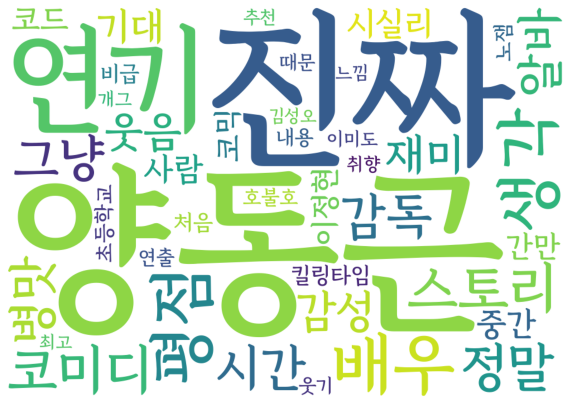

In [69]:
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# BOW

In [29]:
import re
from konlpy.tag import Okt

In [30]:
okt = Okt()

def bow_analyze(txt):
    token = re.sub('[-=,#/?.$)]','',txt) # 특수문자 제거
    token = okt.morphs(token) # Okt 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에 토큰에 저장
    word2index = {}
    bow = []
    for voca in token:
        if voca not in word2index.keys():
            word2index[voca] = len(word2index)
        # 토큰을 읽으면서, word2index에 없는 단어는 새로 추가하고 , 이미 있는 단어는 넘어감
            bow.insert(len(word2index)-1, 1) # bow 기본값 1을 넣어줌, 단어의 개수는 최소 글자 1개 이상으로 처리
        else:
            index = word2index.get(voca) # 재등장하는 단어의 인덱스를 받아옴
            bow[index] = bow[index]+1 # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줌으로써 단어의 개수를 카운트

    print(word2index)
    print(bow)

In [31]:
txt1 = "빅데이터 분석 및 응용 과목은 시험도 없고 과제가 생각보다 너무 적다"
bow_analyze(txt1)

{'빅데이터': 0, '분석': 1, '및': 2, '응용': 3, '과목': 4, '은': 5, '시험': 6, '도': 7, '없고': 8, '과제': 9, '가': 10, '생각': 11, '보다': 12, '너무': 13, '적다': 14}
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [32]:
txt2 = "전공 과목 가운데 취업에 크게 도움되는 과목은 주로 코딩 과목이다."
bow_analyze(txt2)

{'전공': 0, '과목': 1, '가운데': 2, '취업': 3, '에': 4, '크게': 5, '도움': 6, '되는': 7, '은': 8, '주로': 9, '코딩': 10, '이다': 11}
[1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [33]:
txt3 = "마지막 학기를 잘 마무리하는 것도 중요하지만 이후 진로에 대한 고민이 더 큰 과제이다."
bow_analyze(txt3)

{'마지막': 0, '학기': 1, '를': 2, '잘': 3, '마무리': 4, '하는': 5, '것': 6, '도': 7, '중요하지만': 8, '이후': 9, '진로': 10, '에': 11, '대한': 12, '고민': 13, '이': 14, '더': 15, '큰': 16, '과제': 17, '이다': 18}
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [34]:
bow_analyze(txt1+txt2+txt3)

{'빅데이터': 0, '분석': 1, '및': 2, '응용': 3, '과목': 4, '은': 5, '시험': 6, '도': 7, '없고': 8, '과제': 9, '가': 10, '생각': 11, '보다': 12, '너무': 13, '적다': 14, '전공': 15, '가운데': 16, '취업': 17, '에': 18, '크게': 19, '도움': 20, '되는': 21, '주로': 22, '코딩': 23, '이다': 24, '마지막': 25, '학기': 26, '를': 27, '잘': 28, '마무리': 29, '하는': 30, '것': 31, '중요하지만': 32, '이후': 33, '진로': 34, '대한': 35, '고민': 36, '이': 37, '더': 38, '큰': 39}
[1, 1, 1, 1, 4, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


    - BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이기 때문에, 주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰임
    - 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 활용
    

# CountVectorizer 클래스로 BoW 구현하기

#### 영어 문장에 대해 BoW 만들기

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['You know I want your love. because I love you.']
vector = CountVectorizer()

In [36]:
print(vector.fit_transform(corpus).toarray()) # corpus로부터 각 단어의 빈도 수 기록

[[1 1 2 1 2 1]]


In [37]:
print(vector.vocabulary_)# 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### CountVectorizer가 기본적으로 길이가 2 이상인 문자에 대해서만 토큰으로 인식하기 때문에 'i'는 제거

### CountVectorizer는 띄어쓰기 만으로 토큰화가 이루어지므로 한글에서는 조사로 인해 제한적

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["Family is not an important thing. It's everything."]

# stop word = 불용어

vect = CountVectorizer(stop_words=['the', 'a', 'an', 'is', 'not'])
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### CountVectorizer는 불용어를 지정하면, 불용어를 제외하고 BoW를 만들 수 있도록 불용어 제거 기능을 지원

In [41]:
text = ["Family is nor an important thing. It's everything."]

# stop word = 불용어

vect = CountVectorizer(stop_words='english')
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


# TFIDF

In [110]:
import pandas as pd
from math import log # IDF 계산을 위해

In [111]:
docs = [
    '먹고 싶은 사과',
    '먹고 싶은 바나나',
    '길고 노란 바나나 바나나',
    '저는 과일이 좋아요'
]

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [112]:
N = len(docs)

def tf(t,d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t,d) * idf(t)

In [113]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [114]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=['IDF'])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [55]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))
tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


In [57]:
docs

['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

# Tokenization

## Okt 분석기

In [58]:
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs('열심히 코딩한 당신, 연휴에는 여행을 가봐요.'))
print(okt.pos('열심히 코딩한 당신, 연휴에는 여행을 가봐요.'))
print(okt.nouns('열심히 코딩한 당신, 연휴에는 여행을 가봐요.'))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요', '.']
[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb'), ('.', 'Punctuation')]
['코딩', '당신', '연휴', '여행']


## 꼬꼬마 분석기

In [59]:
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.morphs('열심히 코딩한 당신, 연휴에는 여행을 가봐요.'))
print(kkma.pos('열심히 코딩한 당신, 연휴에는 여행을 가봐요.'))
print(kkma.nouns('열심히 코딩한 당신, 연휴에는 여행을 가봐요.'))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요', '.']
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN'), ('.', 'SF')]
['코딩', '당신', '연휴', '여행']


## 예시) 아버지가방에들어가신다

In [60]:
print('okt 형태소 분석기: ', okt.morphs('아버지가방에들어가신다'))
print('꼬꼬마 형태소 분석기: ', kkma.morphs('아버지가방에들어가신다'))

okt 형태소 분석기:  ['아버지', '가방', '에', '들어가신다']
꼬꼬마 형태소 분석기:  ['아버지', '가방', '에', '들어가', '시', 'ㄴ다']


# 저장한 영화 데이터를 활용해 tfidf

In [70]:
import pandas as pd
from math import log

In [77]:
import random

In [410]:
docs = random.sample(list(df['review'].values), 7)

In [411]:
docs

['진짜 킬링타임용이네ㅋㅋ 밥먹을때 틀어놓고 봐도 될 듯',
 '2020년에 이런 허접한 영화가 나올 수 있다는 게 세상에 이런 일이다.',
 '그냥 개재밌는데 왜 재미없대 ㅠㅠ',
 '알바가 있긴 있구나.. 이걸 돈주고 본 내가..ㅂㅅ이지',
 '아... 평점에 속았다...',
 '별점 1도 이해가 갑니다B급 감성없는 분은 그냥  다른영화보세요산책 갔다 계획없이 보니  괜찮았음 ㅋㅋ저는 양동근 배우볼때마다 웃음 따라해보고 싶은 분장 ㅋ다른배우들도  다 좋아하는 배우라   저는 괜찮던데용  여기...',
 '난 재미있던데 ㅋㅋ 넷플덕분에 놓칠뻔했던 다양한 영화들 알게되어서 좋다']

In [412]:
docs_noun = []
for i in range(len(docs)):
    test = []
    for j in range(len(okt.nouns(docs[i]))):
        if len(okt.nouns(docs[i])[j])>1:
    #print('0')
            test.append(okt.nouns(docs[i])[j])
    docs_noun.insert(i, test)

In [413]:
docs_noun

[['진짜', '킬링타임', '용이'],
 ['영화', '세상', '일이'],
 ['그냥'],
 ['알바', '이지'],
 ['평점'],
 ['이해',
  '감성',
  '그냥',
  '영화',
  '산책',
  '계획',
  '양동근',
  '배우',
  '볼때',
  '웃음',
  '분장',
  '배우',
  '배우',
  '여기'],
 ['넷플덕분', '영화']]

In [414]:
vocab = []
for i in range(len(docs_noun)):
    for j in range(len(docs_noun[i])):
        vocab.append(docs_noun[i][j])
vocab = (list(set(vocab)))

In [415]:
N = len(docs_noun)

def tf(t,d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs_noun:
        df += t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t,d) * idf(t)

In [416]:
result = []
for i in range(N):
    result.append([])
    d = docs_noun[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,웃음,이지,배우,이해,킬링타임,그냥,여기,진짜,일이,감성,...,계획,분장,영화,산책,볼때,넷플덕분,세상,양동근,용이,알바
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,3,1,0,1,1,0,0,1,...,1,1,1,1,1,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [421]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=['IDF'])
idf_

,IDF
웃음,1.252763
이지,1.252763
배우,1.252763
이해,1.252763
킬링타임,1.252763
그냥,0.847298
여기,1.252763
진짜,1.252763
일이,1.252763
감성,1.252763


In [418]:
result = []
for i in range(N):
    result.append([])
    d = docs_noun[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))
tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,웃음,이지,배우,이해,킬링타임,그냥,여기,진짜,일이,감성,...,계획,분장,영화,산책,볼때,넷플덕분,세상,양동근,용이,알바
0,0.000000,0.000000,0.000000,0.000000,1.252763,0.000000,0.000000,1.252763,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.252763,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.252763,0.000000,...,0.000000,0.000000,0.559616,0.000000,0.000000,0.000000,1.252763,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.847298,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.252763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.252763
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1.252763,0.000000,3.758289,1.252763,0.000000,0.847298,1.252763,0.000000,0.000000,1.252763,...,1.252763,1.252763,0.559616,1.252763,1.252763,0.000000,0.000000,1.252763,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.559616,0.000000,0.000000,1.252763,0.000000,0.000000,0.000000,0.000000


In [419]:
a = []
for i in range(len(docs_noun)):
    for j in range(len(docs_noun[i])):
        a.append(docs_noun[i][j])
print(Counter(a))

Counter({'영화': 3, '배우': 3, '그냥': 2, '진짜': 1, '킬링타임': 1, '용이': 1, '세상': 1, '일이': 1, '알바': 1, '이지': 1, '평점': 1, '이해': 1, '감성': 1, '산책': 1, '계획': 1, '양동근': 1, '볼때': 1, '웃음': 1, '분장': 1, '여기': 1, '넷플덕분': 1})


In [426]:
tfidf_[['영화']]

,영화
0,0.000000
1,0.559616
2,0.000000
3,0.000000
4,0.000000
5,0.559616
6,0.559616


In [428]:
tfidf_[['배우']]

,배우
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,3.758289
6,0.000000


    - 3번씩 나온 영화, 배우 두 단어가 최빈단어이다. 
    - 영화는 7개의 리뷰 중 3개에 각각 한번씩 나와 리뷰에서 0.55씩의 중요도를 갖고 있다. 
    - 그런데 배우는 하나의 리뷰에 3번 나왔기 때문에 5번 리뷰에서 3.75의 중요도를 갖고 있다.